Problema em sala - Treinamento Iris

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns # visualization
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_csv('student/student-mat.csv', delimiter=';')
data.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


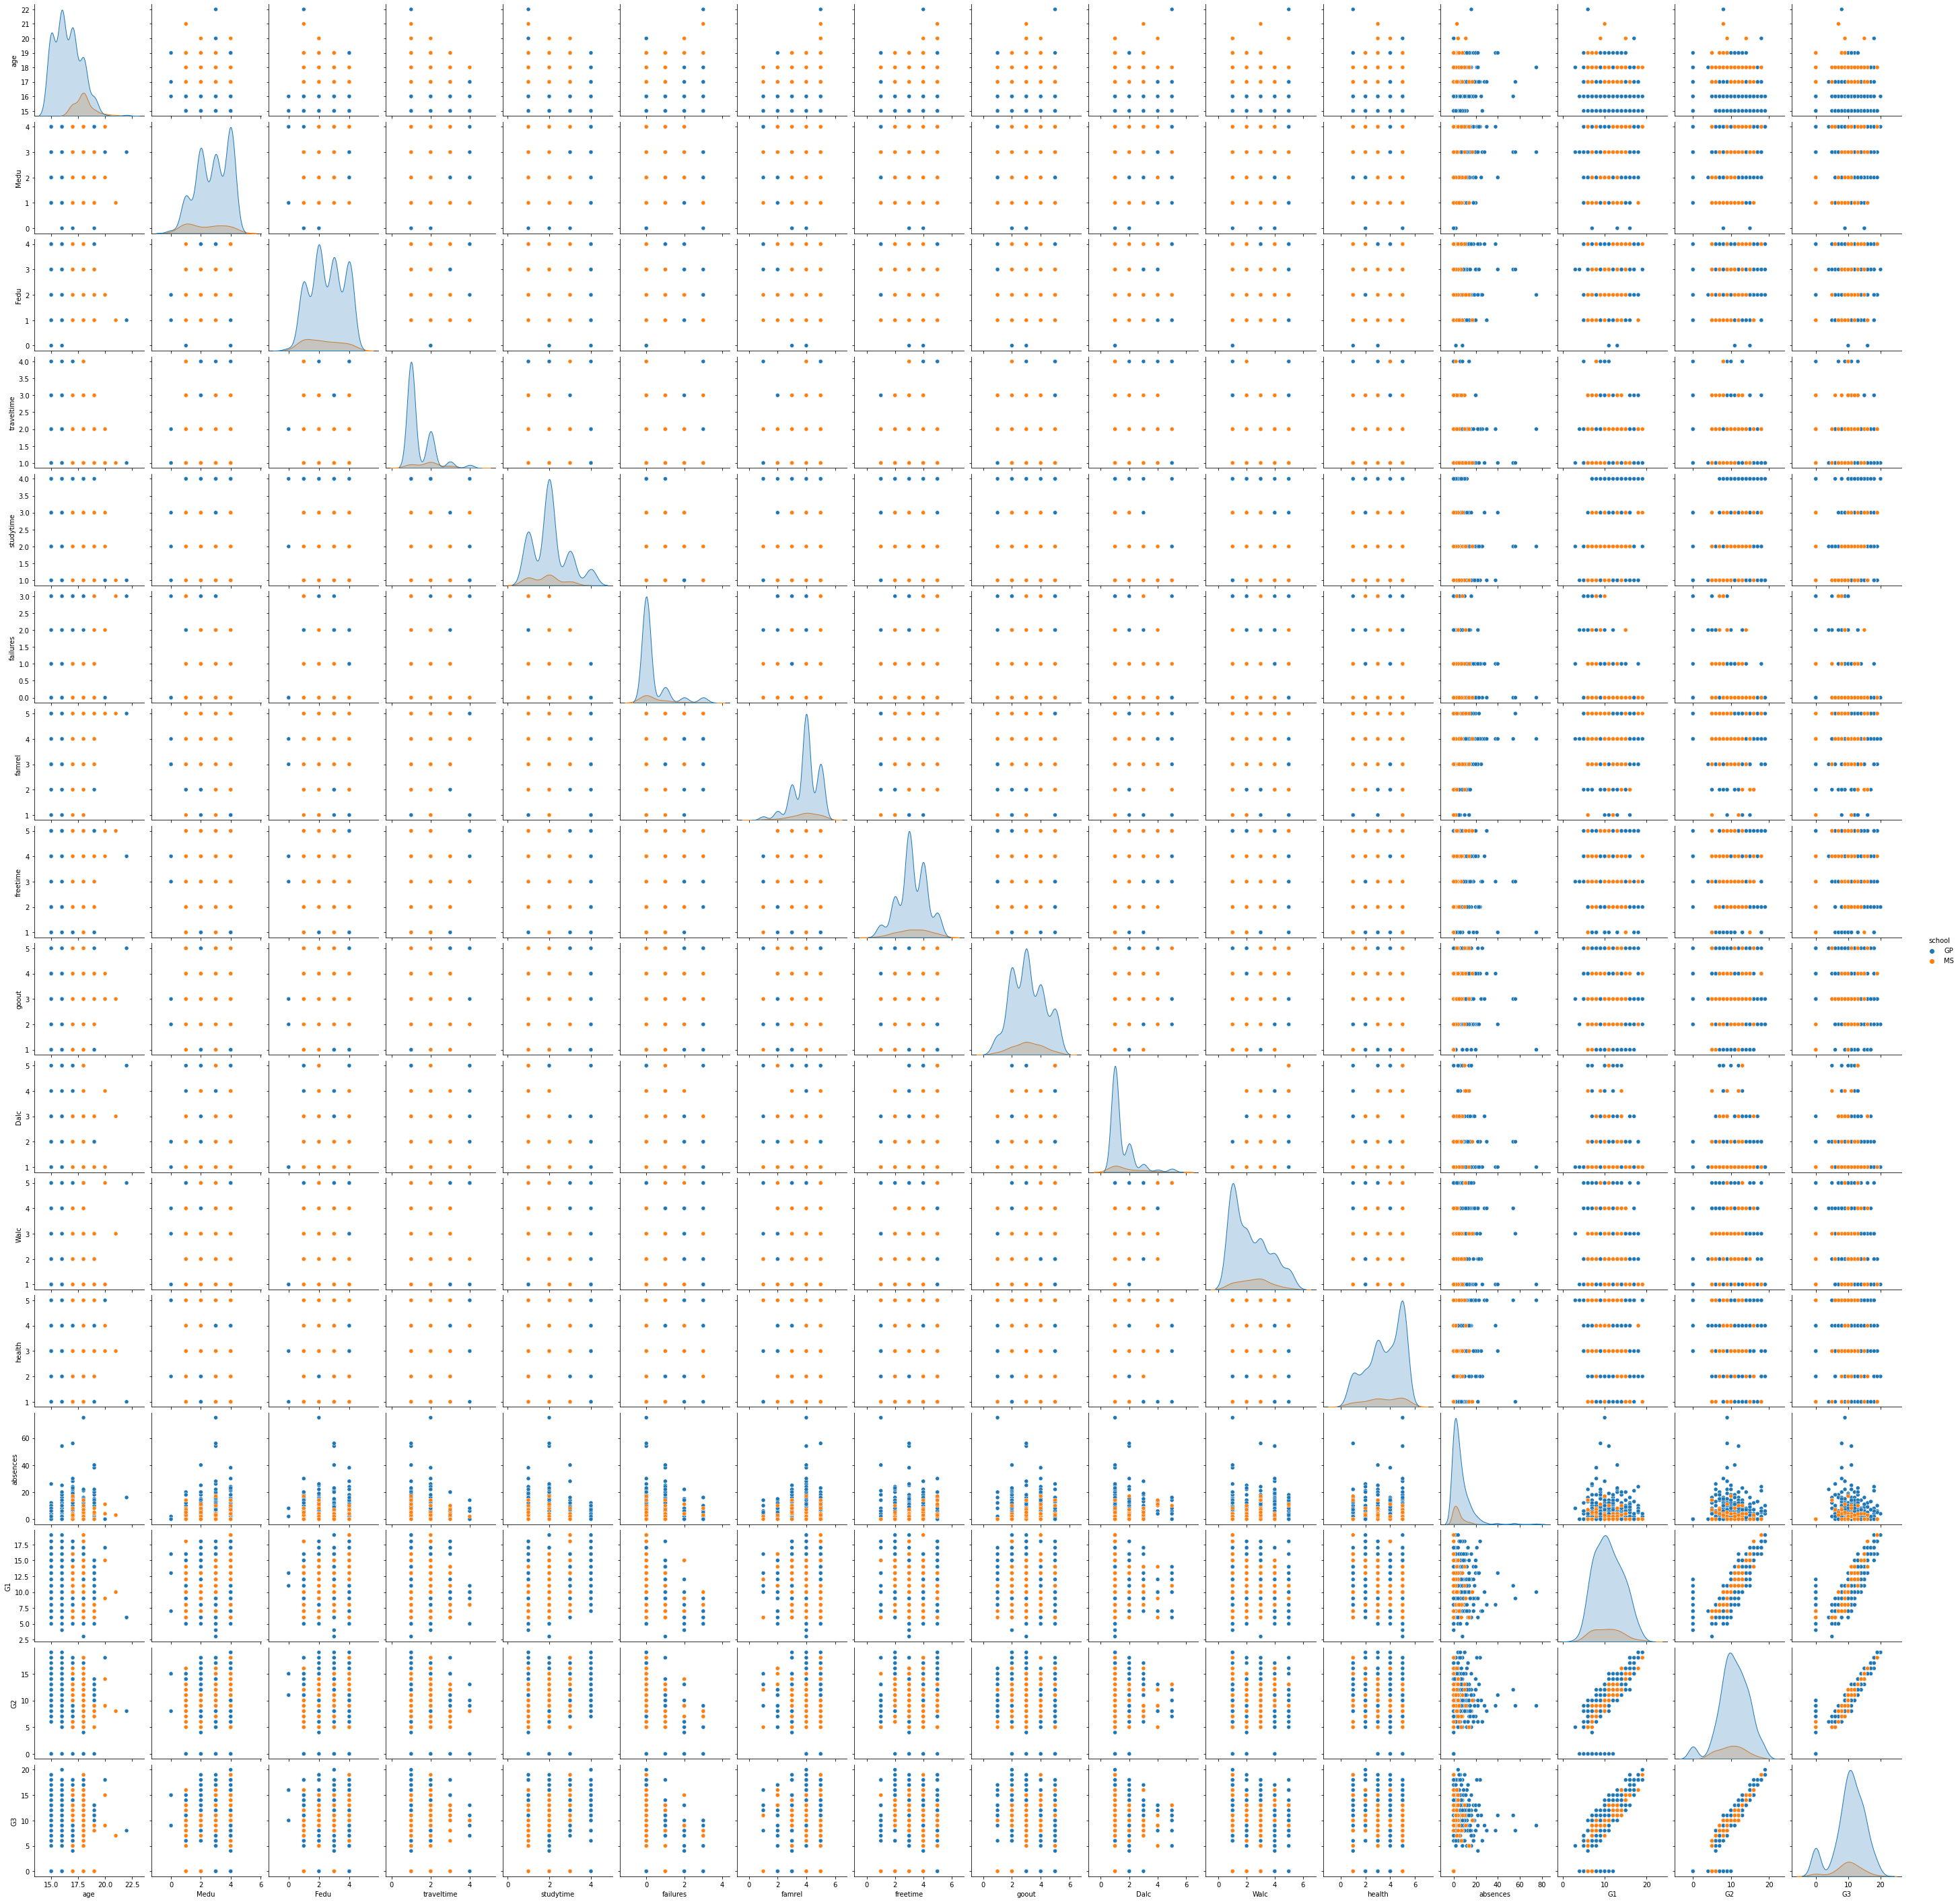

In [4]:
sns.pairplot( data=data, vars=('age','Medu', 'Fedu','traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'),hue='school')

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Preprocessamento, Normalização das features;

In [6]:
data_norm = data[[ 'age','Medu', 'Fedu','traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min()))
data_norm.sample(n=5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
53,0.000000,1.00,1.00,0.0,0.000000,0.0,0.50,0.50,0.75,0.25,0.50,1.0,0.000000,0.3125,0.526316,0.55
378,0.428571,0.75,0.75,0.0,0.333333,0.0,0.75,0.00,0.50,0.00,0.25,0.0,0.000000,0.7500,0.789474,0.75
87,0.000000,1.00,0.50,0.0,0.666667,0.0,1.00,0.50,0.50,0.00,0.50,0.0,0.053333,0.6250,0.736842,0.70
6,0.142857,0.50,0.50,0.0,0.333333,0.0,0.75,0.75,0.75,0.00,0.00,0.5,0.000000,0.5625,0.631579,0.55
106,0.000000,0.50,0.50,0.0,1.000000,0.0,1.00,0.00,0.25,0.00,0.00,0.5,0.106667,0.2500,0.421053,0.40


In [7]:
data_norm.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,0.30
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,0.30
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,0.50
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,0.75
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,0.50


In [8]:
data_norm.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.00000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.242315,0.687342,0.63038,0.149367,0.345148,0.111392,0.736076,0.558861,0.527215,0.120253,0.322785,0.638608,0.076118,0.494304,0.563891,0.520759
std,0.182292,0.273684,0.27205,0.232502,0.279747,0.247884,0.224165,0.249716,0.278320,0.222685,0.321974,0.347576,0.106708,0.207450,0.197974,0.229072
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.50000,0.000000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.500000,0.000000,0.312500,0.473684,0.400000
50%,0.285714,0.750000,0.50000,0.000000,0.333333,0.000000,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.053333,0.500000,0.578947,0.550000
75%,0.428571,1.000000,0.75000,0.333333,0.333333,0.000000,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,0.106667,0.625000,0.684211,0.700000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Transformação de classes (variáveis de saída) para valores numéricos.

In [9]:
target = data[['school']].replace(
    ['GP','MS'], [0, 1])
target.sample(n=5)

,school
328,0
22,0
356,1
384,1
53,0


In [10]:
df = pd.concat([data_norm, target], axis=1)
df.sample(n=5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school
304,0.571429,0.75,0.75,0.0,0.333333,0.333333,0.75,0.75,0.75,0.0,0.00,0.5,0.266667,0.7500,0.736842,0.65,0
98,0.142857,1.00,1.00,0.0,0.000000,0.000000,1.00,0.50,0.75,0.0,0.25,0.0,0.080000,0.5000,0.736842,0.70,0
262,0.428571,0.75,0.50,0.0,0.666667,0.000000,1.00,0.50,0.25,0.0,0.00,0.5,0.013333,0.6250,0.631579,0.60,0
242,0.142857,1.00,0.75,0.0,0.000000,0.000000,1.00,0.75,1.00,0.0,0.00,0.5,0.000000,0.1875,0.000000,0.00,0
309,0.571429,0.25,0.25,0.0,0.333333,0.333333,0.75,0.75,0.50,0.0,0.50,0.5,0.240000,0.5625,0.526316,0.50,0


Particionamento do dataset íris para treino, teste e validação da MLp.

In [11]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]
trainY = train.school 
testX = test[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
              'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]
testY = test.school
trainX.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
34,0.142857,0.75,0.50,0.0,0.000000,0.0,1.00,0.75,0.50,0.0,0.00,1.00,0.00,0.5625,0.736842,0.75
16,0.142857,1.00,1.00,0.0,0.666667,0.0,0.50,0.25,0.50,0.0,0.25,0.25,0.08,0.6250,0.736842,0.70
121,0.000000,0.50,0.50,0.0,1.000000,0.0,1.00,1.00,0.75,0.0,0.25,1.00,0.08,0.8125,0.736842,0.75
355,0.428571,0.75,0.75,0.0,0.333333,0.0,1.00,0.50,0.75,0.0,0.00,1.00,0.00,0.4375,0.473684,0.45
378,0.428571,0.75,0.75,0.0,0.333333,0.0,0.75,0.00,0.50,0.0,0.25,0.00,0.00,0.7500,0.789474,0.75


In [12]:
trainY.head(5)

34     0
16     0
121    0
355    1
378    1
Name: school, dtype: int64

In [13]:
testX.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
114,0.000000,0.50,0.25,0.0,0.333333,0.000000,1.00,0.75,0.25,0.0,0.00,1.0,0.106667,0.3750,0.473684,0.45
120,0.000000,0.25,0.50,0.0,0.333333,0.000000,0.50,0.25,0.50,0.0,0.25,0.0,0.026667,0.8125,0.789474,0.75
270,0.571429,0.75,0.75,0.0,0.333333,0.666667,0.75,0.50,1.00,0.5,0.50,1.0,0.200000,0.3750,0.473684,0.45
344,0.428571,0.50,0.75,0.0,0.666667,0.000000,0.75,0.50,0.50,0.0,0.25,0.5,0.053333,0.5000,0.526316,0.50
151,0.142857,0.50,0.25,0.0,0.000000,0.333333,0.75,0.75,0.75,0.5,1.00,1.0,0.080000,0.5625,0.684211,0.70


In [14]:
testY.head(5)

114    0
120    0
270    0
344    0
151    0
Name: school, dtype: int64

# Classificador MLP do scikit learning parametrizado parao classificador iris cabe conferir o significado desses parametros na documentação do MLPClassifier.

In [15]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [16]:
clf.fit(trainX, trainY)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

predição usando a porção de dados de teste

In [17]:
prediction = clf.predict(testX)
print(prediction)

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0]


In [18]:
print(testY.values)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0]


Usando a métrica acurácia da scikit learning.

In [19]:
print('A Acurácia do MLP é:', metrics.accuracy_score(prediction,testY))

A Acurácia do MLP é: 0.865546218487395
